In [63]:
# import libraries
import tweepy
import csv
import matplotlib as plt
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adrian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [64]:
# Dataframe
df = pd.read_csv('Files/reviews_unprocessed.csv', usecols = ['id', 'date','username','text','score','polarity'])
df.index.name = 'no'

print ('Dataset size, column:', df.shape)
# df.info()
df.sample(n=10)


Dataset size, column: (1000, 6)


,id,date,username,text,score,polarity
no,,,,,,
430,f493d3cd-88e7-4822-a334-79c7132115be,2022-11-12 10:20:50,Irwan Ahsan,Semalam tarik tunai tanpa kartu ATM ke BCA..da...,1,-1
30,350d71eb-7317-4893-807c-8bea1bc5a625,2022-11-26 15:58:44,REZA ADITYA,Gak bisa di buat transfer malah keluar notifik...,1,-1
962,3ac2cad7-ea89-4535-9b8c-e88af407afe7,2022-07-10 03:30:09,theresia rahayu,"Membantu sekali, apa lagi jaman sekarang susah...",5,1
901,2971719d-a3e3-47b5-ba6a-e532fc7571c6,2022-07-14 18:26:01,anik indriyani,"Saya suka pakai gojek,tapi kenapa ya...titik a...",5,1
224,a4462ed2-2bba-4572-a1f6-f0a206ad31fc,2022-09-26 18:23:58,Antonius Budihardjo,Belakangan ini saya pemakai setia gojek sbg ku...,1,-1
21,8ba9b390-5ca0-410a-87ba-e60a0cfd2a6f,2022-11-26 02:34:02,Vicky Wahyu Wibowo,"Bagus sih, tp Semakin kesini semakin ancur .. ...",1,-1
802,20e3f0da-7c26-4362-af42-da32f7cbb609,2022-10-08 18:39:15,gifi rafis,Tidak bisa masuk ke acount lama krn no sdh tid...,5,1
811,ae07af85-3c6e-4567-bbe5-b7e180ca37e7,2022-10-02 18:40:48,Hendra Tanudinata,Sangat berguna dan membantu aktifitas saya.Sek...,5,1
689,e5fa42fc-0ef4-45cc-a532-d2c3bd37c946,2022-11-25 15:28:37,Arisson Mercinova,"Bagus aplikasinya, mudah digunakan dan lancar ...",5,1


-1    500
 1    500
Name: polarity, dtype: int64

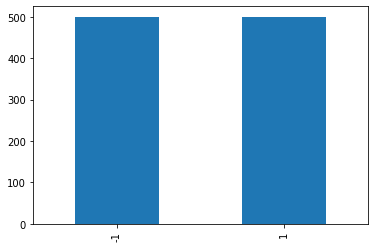

In [65]:
plot_ratings = df['polarity'].value_counts().sort_index().plot.bar(x='score', y='amount')
df['polarity'].value_counts().sort_index()

In [66]:
# Function to clean text from uneccessary characters
def cleanText(text):
    # remove other than word
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # remove double or more whitespace
    text = re.sub(r'\s\s+', ' ', text)
    # remove whitespace at the start
    text = text.strip()
    
    return text

# Show cleaned text
df['clean_text'] = df['text'].apply(cleanText)

df

,id,date,username,text,score,polarity,clean_text
no,,,,,,,
0,31884961-a19d-4065-9838-bd02edc7c0d1,2022-11-28 02:05:07,Bahrul Ulum Fiadana,Sebaiknya jangan hanya fitur masuk menggunakan...,1,-1,Sebaiknya jangan hanya fitur masuk menggunakan...
1,ceaa7289-ffe0-4626-bc27-cdc3d915e4ae,2022-11-12 21:49:20,Lucky Putriana,saya tau gojek berusaha memberikan pengalaman ...,1,-1,saya tau gojek berusaha memberikan pengalaman ...
2,feac97da-c121-41c9-baa8-c0729f8d12d7,2022-11-30 18:11:29,X-AKL3.19.MUHAMMAD KHRESNA BIJAK,"Aplikasi kurang memuaskan, tiba-tiba melog-out...",1,-1,Aplikasi kurang memuaskan tiba tiba melog outk...
3,7e76d3fd-7e71-4fbe-8d79-ebe05f9f416c,2022-11-29 02:21:46,Hafizgasta,"Pesan go food, tertera dilayar server sedang s...",1,-1,Pesan go food tertera dilayar server sedang si...
4,94067ac0-04a7-4da5-bbf3-fd0b7b542c23,2022-11-29 21:10:40,Laksamana Ecoo,"Untuk perubahan gopay later nya pakai privy, j...",1,-1,Untuk perubahan gopay later nya pakai privy ja...
...,...,...,...,...,...,...,...
995,27a3c2e5-6828-4bdc-8218-31fb121fbe4a,2022-09-15 17:30:21,PAK YONO,"Solusi buat anda yg pengen makan tapi mager, p...",5,1,Solusi buat anda yg pengen makan tapi mager pe...
996,b106baf1-9e96-479f-b0e9-5083da83e382,2022-10-31 18:40:06,Mahjit Dwi cahyo,"Pesen makan, ojeg mudah. Bisa cashbon juga. Bi...",5,1,Pesen makan ojeg mudah Bisa cashbon juga Biaya...
997,40ec27c6-f863-447e-93fa-b638073e07ae,2022-11-17 13:44:49,mahfuroh yusuf,Mau tanya gomart tuh cuma bisa di Alfamart saj...,5,1,Mau tanya gomart tuh cuma bisa di Alfamart saj...


In [67]:
# Tokenization and case folding
def tokenization(text):
    text = re.split('[^\w]+', text.lower())

    # Removing stopwords
    stopwords = nltk.corpus.stopwords.words('indonesian')
    text = [word for word in text if word not in stopwords]
    return text

df['token_1'] = df['clean_text'].apply(tokenization)

def bigram(text):

    text = list(nltk.bigrams([word for word in text]))
    return text

df['token_2'] = df['token_1'].apply(bigram)

df.to_csv('Files/preprocessed-data.csv', columns = ['id', 'text', 'token_1', 'token_2', 'polarity'])
df[['token_1', 'token_2']]

,token_1,token_2
no,,
0,"[fitur, masuk, nomor, sim, akun, pemulihan, ak...","[(fitur, masuk), (masuk, nomor), (nomor, sim),..."
1,"[tau, gojek, berusaha, pengalaman, perjalanan,...","[(tau, gojek), (gojek, berusaha), (berusaha, p..."
2,"[aplikasi, memuaskan, melog, outkan, aplikasi,...","[(aplikasi, memuaskan), (memuaskan, melog), (m..."
3,"[pesan, go, food, tertera, dilayar, server, si...","[(pesan, go), (go, food), (food, tertera), (te..."
4,"[perubahan, gopay, later, nya, pakai, privy, r...","[(perubahan, gopay), (gopay, later), (later, n..."
...,...,...
995,"[solusi, yg, pengen, makan, mager, pengen, per...","[(solusi, yg), (yg, pengen), (pengen, makan), ..."
996,"[pesen, makan, ojeg, mudah, cashbon, biaya, ad...","[(pesen, makan), (makan, ojeg), (ojeg, mudah),..."
997,"[gomart, tuh, alfamart, yahh, aplikasi, alfama...","[(gomart, tuh), (tuh, alfamart), (alfamart, ya..."
